# Objective

- Illustrate how expert intervention could be used to improve LLM responses.
- Illustrate how the expert intervention pattern could be used to create tutoring applications

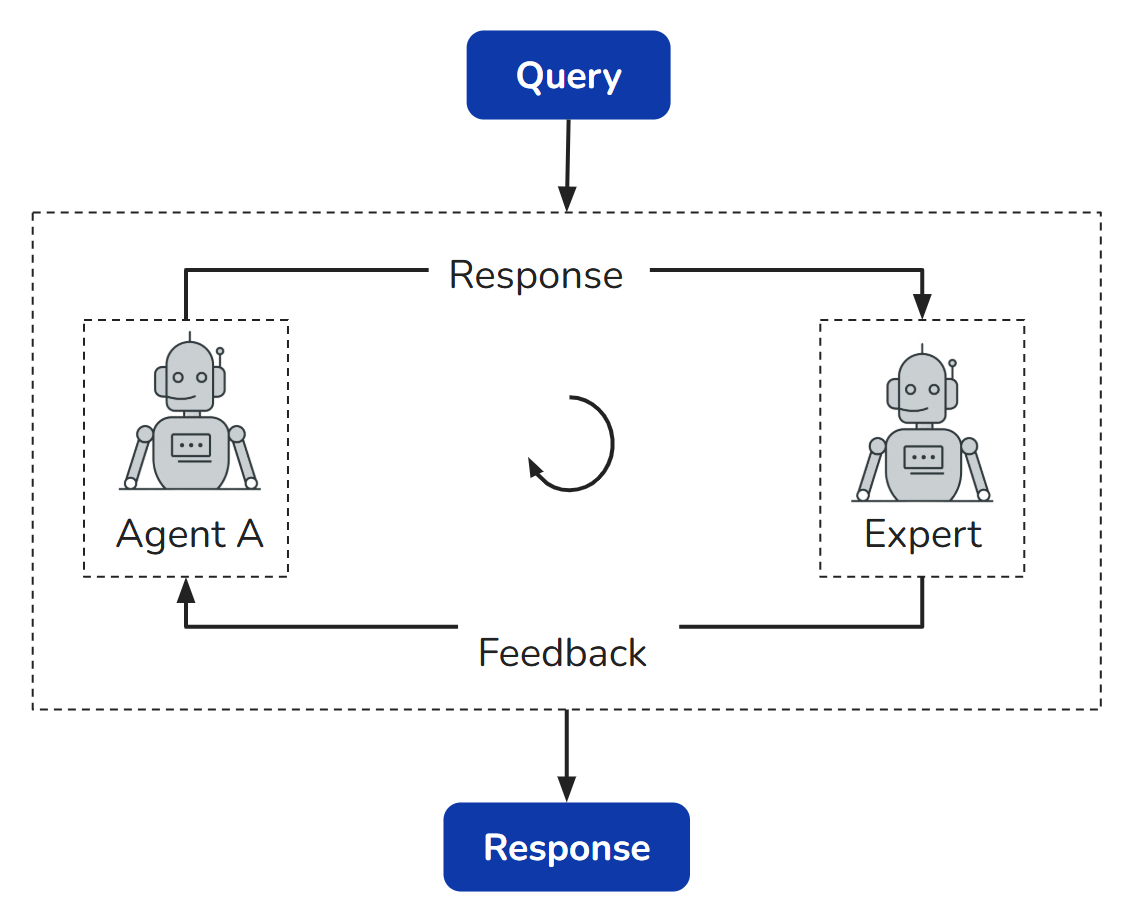

# Setup

## Installation

In [ ]:
! pip install -q openai==1.55.3 \
                 langchain==0.3.7 \
                 langchain-openai==0.2.9

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.0 MB/s eta 0:00:00


## Imports

In [ ]:
import json
import time

from openai import AzureOpenAI

from langchain_openai import AzureChatOpenAI
from langchain_core.messages import AIMessage, BaseMessage, HumanMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

In [ ]:
with open('config-azure.json') as f:
    configs = f.read()

In [ ]:
creds = json.loads(configs)

In [ ]:
azure_openai_client = AzureOpenAI(
    api_key=creds['AZURE_OPENAI_KEY'],
    api_version=creds['AZURE_OPENAI_APIVERSION'],
    azure_endpoint=creds['AZURE_OPENAI_ENDPOINT']
)

# Extending Self-Reflection to Expert-led Reflection

In the self-reflection example, an agent looks at their own work to improve responses. Merely switching the reflector to an expert LLM (either a more powerful LLM or a fine-tuned LLM) can provide expert guidance to the generator LLM.

The code segment below shows how self-reflection as discussed in the previous notebook can be extended to expert-led reflection by changing the LLM from GPT-4o-mini to GPT-4o.

In [ ]:
financial_statement_context_data = """
Overview and 2023 Highlights
Our mission is to accelerate the world's transition to sustainable energy. We design, develop, manufacture, lease and sell high-performance fully electric vehicles, solar energy generation systems and energy storage products. We also offer maintenance, installation, operation, charging, insurance, financial and other services related to our products. Additionally, we are increasingly focused on products and services based on artificial intelligence, robotics and automation.
In 2023, we produced 1,845,985 consumer vehicles and delivered 1,808,581 consumer vehicles. We are currently focused on increasing vehicle production, capacity and delivery capabilities, reducing costs, improving and developing our vehicles and battery technologies, vertically integrating and localizing our supply chain, improving and further deploying our FSD capabilities, increasing the affordability and efficiency of our vehicles, bringing new products to market and expanding our global infrastructure, including our service and charging infrastructure.
In 2023, we deployed 14.72 GWh of energy storage products and 223 megawatts of solar energy systems. We are currently focused on ramping production of energy storage products, improving our Solar Roof installation capability and efficiency, and increasing market share of retrofit solar energy systems.
In 2023, we recognized total revenues of $96.77 billion, representing an increase of $15.31 billion, compared to the prior year. We continue to ramp production, build new manufacturing capacity and expand our operations to enable increased deliveries and deployments of our products, and invest in research and development to accelerate our AI, software and fleet-based profits for further revenue growth.
In 2023, our net income attributable to common stockholders was $15.00 billion, representing a favorable change of $2.44 billion, compared to the prior year. This included a one-time non-cash tax benefit of $5.93 billion for the release of valuation allowance on certain deferred tax assets. We continue to focus on further cost reductions and operational efficiencies while maximizing delivery volumes.
We ended 2023 with $29.09 billion in cash and cash equivalents and investments, representing an increase of $6.91 billion from the end of 2022. Our cash flows provided by operating activities in 2023 and 2022 were $13.26 billion and $14.72 billion, respectively, representing a decrease of $1.47 billion. Capital expenditures amounted to $8.90 billion in 2023, compared to $7.16 billion in 2022, representing an increase of $1.74 billion. Sustained growth has allowed our business to generally fund itself, and we will continue investing in a number of capital-intensive projects and research and development in upcoming periods.

We are focused on growing our manufacturing capacity, which includes capacity for manufacturing new vehicle models such as our Cybertruck and next generation platform, and ramping all of our production vehicles to their installed production capacities as well as increasing production rate and efficiency at our current factories. The next phase of production growth will depend on the continued ramp at our factories and the introduction of our next generation platform, as well as our ability to add to our available sources of battery cell supply by manufacturing our own cells that we are developing to have high-volume output, lower capital and production costs and longer range. Our goals are to improve vehicle performance, decrease production costs and increase affordability and customer awareness.
These plans are subject to uncertainties inherent in establishing and ramping manufacturing operations, which may be exacerbated by new product and manufacturing technologies we introduce, the number of concurrent international projects, any industry-wide component constraints, labor shortages and any future impact from events outside of our control. For example, during the third quarter of 2023, we experienced a sequential decline in production volumes due to pre-planned shutdowns for upgrades at various factories. Moreover, we have set ambitious technological targets with our plans for battery cells as well as for iterative manufacturing and design improvements for our vehicles with each new factory.
Automotive—Demand, Sales, Deliveries and Infrastructure
Our cost reduction efforts, cost innovation strategies, and additional localized procurement and manufacturing are key to our vehicles’ affordability and have allowed us to competitively price our vehicles. We will also continue to generate demand and brand awareness by improving our vehicles’ performance and functionality, including through products based on artificial intelligence such as Autopilot, FSD Capability, and other software features and delivering new vehicles, such as our Cybertruck. Moreover, we expect to continue to benefit from ongoing electrification of the automotive sector and increasing environmental regulations and initiatives.
However, we operate in a cyclical industry that is sensitive to political and regulatory uncertainty, including with respect to trade and the environment, all of which can be compounded by inflationary pressures, rising energy prices, interest rate fluctuations and the liquidity of enterprise customers. For example, inflationary pressures have increased across the markets in which we operate. In an effort to curb this trend, central banks in developed countries raised interest rates rapidly and substantially, impacting the affordability of vehicle lease and finance arrangements. Further, sales of vehicles in the automotive industry also tend to be cyclical in many markets, which may expose us to increased volatility as we expand and adjust our operations. Moreover, as additional competitors enter the marketplace and help bring the world closer to sustainable transportation, we will have to adjust and continue to execute well to maintain our momentum. Additionally, our suppliers’ liquidity and allocation plans may be affected by current challenges in the North American automotive industry, which could reduce our access to components or result in unfavorable changes to cost. These macroeconomic and industry trends have had, and will likely continue to have, an impact on the pricing of, and order rate for our vehicles, and in turn our operating margin. Changes in government and economic incentives in relation to electric vehicles may also impact our sales. We will continue to adjust accordingly to such developments, and we believe our ongoing cost reduction, including improved production innovation and efficiency at our newest factories and lower logistics costs, and focus on operating leverage will continue to benefit us in relation to our competitors, while our new products will help enable future growth.

As our production increases, we must work constantly to similarly increase vehicle delivery capability so that it does not become a bottleneck on our total deliveries. We are also committed to reducing the percentage of vehicles delivered in the third month of each quarter, which will help to reduce the cost per vehicle. As we expand our manufacturing operations globally, we will also have to continue to increase and staff our delivery, servicing and charging infrastructure accordingly, maintain our vehicle reliability and optimize our Supercharger locations to ensure cost effectiveness and customer satisfaction. In particular, as other automotive manufacturers have announced their adoption of the North American Charging Standard (“NACS”) and agreements with us to utilize our Superchargers, we must correspondingly expand our network in order to ensure adequate availability to meet customer demands. We also remain focused on continued enhancements of the capability and efficiency of our servicing operations.
Energy Generation and Storage Demand, Production and Deployment
The long-term success of this business is dependent upon increasing margins through greater volumes. We continue to increase the production of our energy storage products to meet high levels of demand, including the construction of a new Megafactory in Shanghai and the ongoing ramp at our Megafactory in Lathrop, California. For Megapack, energy storage deployments can vary meaningfully quarter to quarter depending on the timing of specific project milestones. We remain committed to growing our retrofit solar energy business by offering a low-cost and simplified online ordering experience. In addition, we continue to seek to improve our installation capabilities and price efficiencies for Solar Roof. As these product lines grow, we will have to maintain adequate battery cell supply for our energy storage products and ensure the availability of qualified personnel, particularly skilled electricians, to support the ramp of Solar Roof.
Cash Flow and Capital Expenditure Trends
Our capital expenditures are typically difficult to project beyond the short-term given the number and breadth of our core projects at any given time, and may further be impacted by uncertainties in future global market conditions. We are simultaneously ramping new products, building or ramping manufacturing facilities on three continents, piloting the development and manufacture of new battery cell technologies, expanding our Supercharger network and investing in autonomy and other artificial intelligence enabled training and products, and the pace of our capital spend may vary depending on overall priority among projects, the pace at which we meet milestones, production adjustments to and among our various products, increased capital efficiencies and the addition of new projects. Owing and subject to the foregoing as well as the pipeline of announced projects under development, all other continuing infrastructure growth and varying levels of inflation, we currently expect our capital expenditures to exceed $10.00 billion in 2024 and be between $8.00 to $10.00 billion in each of the following two fiscal years.
Our business has been consistently generating cash flow from operations in excess of our level of capital spend, and with better working capital management resulting in shorter days sales outstanding than days payable outstanding, our sales growth is also generally facilitating positive cash generation. We have and will continue to utilize such cash flows, among other things, to do more vertical integration, expand our product roadmap and provide financing options to our customers. At the same time, we are likely to see heightened levels of capital expenditures during certain periods depending on the specific pace of our capital-intensive projects and other potential variables such as rising material prices and increases in supply chain and labor expenses resulting from changes in global trade conditions and labor availability. Overall, we expect our ability to be self-funding to continue as long as macroeconomic factors support current trends in our sales.
"""

In [ ]:
question = "How are the company's efforts to increase capacity going to impact their bottomline?"

In [ ]:
generator_llm = AzureChatOpenAI(
    azure_endpoint=creds['AZURE_OPENAI_ENDPOINT'],
    api_key=creds['AZURE_OPENAI_KEY'],
    api_version="2024-02-01",
    model="gpt-4o-mini",
    temperature=0
)

In [ ]:
reflector_llm = AzureChatOpenAI(
    azure_endpoint=creds['AZURE_OPENAI_ENDPOINT'],
    api_key=creds['AZURE_OPENAI_KEY'],
    api_version="2024-02-01",
    model="gpt-4o",
    temperature=0
)

Notice that the only difference between the generator and the reflector as defined above is the LLM.

In [ ]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert analyst at a financial services firm who answers user queries on annual reports."
            " User input will have the context required by you to answer user questions."
            " This context will begin with the word: ###Context."
            " The context contains documents relevant to the user query.."
            " User questions will begin with the word: ###Question."
            " Please answer user questions only using the context provided in the input."
            " If the user provides critique, respond with a revised version of your previous attempts.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

In [ ]:
generator = prompt | generator_llm

In [ ]:
request = HumanMessage(
    content=f"""
    ###Context:
    {financial_statement_context_data}
    ---
    ###Question:
    {question}
    """
)

In [ ]:
response = generator.invoke({'messages': [request]})

In [ ]:
print(response.content)

The company's efforts to increase manufacturing capacity are aimed at ramping production of new vehicle models and existing production vehicles to their installed capacities. This is expected to improve vehicle performance, decrease production costs, and increase affordability, which can enhance customer awareness and demand. By focusing on cost reduction strategies, localized procurement, and manufacturing, the company aims to competitively price its vehicles, potentially leading to increased sales and revenue.

As production increases, the company is also committed to enhancing vehicle delivery capabilities to avoid bottlenecks, which can further support sales growth. The expansion of manufacturing operations globally will necessitate corresponding increases in delivery, servicing, and charging infrastructure, which could lead to higher operational efficiencies and customer satisfaction.

Overall, these efforts are likely to positively impact the bottom line by driving revenue growth

In [ ]:
reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are an expert financial analyst rating an answer to a question. Generate critique and recommendations for the user's submission."
            " Provide detailed recommendations, including factual grounding, logic, coherence, etc.",
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

reflector = reflection_prompt | reflector_llm

In [ ]:
reflection = reflector.invoke({'messages': [request, HumanMessage(content=response.content)]})

In [ ]:
print(reflection.content)

Your response provides a good overview of how the company's efforts to increase manufacturing capacity could impact their bottom line. However, there are several areas where you could improve the depth and clarity of your analysis. Here are some detailed recommendations:

1. **Factual Grounding and Specificity**:
   - **Production and Delivery**: You mentioned that the company is ramping up production of new vehicle models and existing production vehicles. It would be beneficial to specify which models are being focused on, such as the Cybertruck and next-generation platforms, as mentioned in the context.
   - **Energy Storage and Solar Products**: The context also highlights the company's efforts in energy storage and solar products. Including these aspects in your analysis would provide a more comprehensive view of the company's capacity expansion efforts.

2. **Financial Metrics and Projections**:
   - **Revenue and Profit Margins**: While you mentioned that increased capacity could

As the above output indicates GPT-4o now acts as an expert guiding the output of the generator LLM GPT-4o-mini.

# Business Use Case

## Expert AI Tutor

The marketing division of a company has invested in generative AI capabilities to help create marketing content. To train members on this platform they want to set up an AI-assisted learning platform where marketing team members are trained to prompt an LLM to generate marketing content.


To illustrate how such a workflow could be implemented, consider the following specific case where the business wants to create an exciting Twitter post announcing the launch of a gaming keyboard defined below.

In [ ]:
product_description_data = """
Product Name: ZEBRONICS Transformer K1 Premium Gaming Keyboard
Description: The ZEB-Transformer K1 is a high-performing gaming keyboard with 104 plastic keys that are set up in a conventional configuration. The keyboard can withstand one million keystrokes
Each key on this keyboard is coated with laser keycaps for a top print that will persist even after several taps
It is possible to integrate a total of 12 multimedia keys for managing audio, playback, volume, and other multi-media operations
Both the Windows key lock function and the All Keys child-lock function on the keyboard can be individually enabled and disabled
The ZEB-Transformer K1 keyboard boasts a multicolored LED that is simple to use and operates in two modes, each of which has three carefully chosen color hues and an OFF setting. A key designated for controlling LEDs can be used to adjust the lighting settings
To enable connectivity on this highly efficient gaming keyboard with laptops/ PCs, the keyboard comes with a 1.7m cable length (PVC cable) using a USB interface
"""

In [ ]:
business_objective = """
Given a product description come up with an exciting Twitter post announcing the product launch.
Target audience: Young Gamers
"""

The ideal prompt to achieve this business objective as written by the generative AI expert in the team is presented below.

In [ ]:
gold_response = """
Write an exciting and energetic Twitter post announcing the launch of a new gaming keyboard as detailed out in the product description.
Highlight its standout features, while emphasizing how it enhances the gaming experience.
Use an engaging tone that resonates with a youthful audience, and include a clear call to action to check it out or learn more.
Incorporate appropriate hashtags like #GamingKeyboard, #LevelUp, or #GamerGear, and consider mentioning a website or promo link
"""

The AI tutor system needs to guide the employees to be able to write the prompt in line with the gold response. In this context, a key feature that needs implementation is  pointed, guided feedback from an expert AI tutor to employees on writing good prompts.

## Solution Implementation

There are two important aspects of the AI tutor that need implementation:

- For the use cases the business wants to train employees on, there is a gold response that the employees ('students') need to discover. The AI tutor is aware of the gold response and needs to nudge the students towards the gold response by providing pointed feedback.
- Students should be able to chat with their LLM as they would in a single thread improving the output by incorporating feedback from the expert at each step.

Let us now implement these two aspects. We begin by declaring the student LLM and the tutor LLM.

In [ ]:
tutor_model_name = 'gpt-4o'
student_model_name = 'gpt-4o-mini'

Let us now compose the tutor system message. In this system message, we instruct the tutor to compare the gold response provided for the given business objective and the entire history of attempts from the student (since this is a single chat thread). Based on this comparison, feedback is constantly given till there is no further improvement is needed.

In [ ]:
tutor_system_message = """
You are an expert tutor who can give useful, pointed hints on user responses towards a gold response.

The gold response will be presented in the input starting with the word: ###Gold Response.

Users will make attempts to come up with prompts to use a Large Language Model (LLM) to achieve a specific business objective delineated with the word: ###Objective.
These attempts will be delineated with the word: ###User Attempt History. Look at all the messages in this history to provide a hint.

Your task is to provide hints to the user to approach the Gold Response.
You need to focus only on the user instructions mentioned in their attempt and not on the quality of the output from the LLM.

Provide focused hints on the aspects of the response that the user has submitted correctly and provide hints for them to improve towards the gold response.
If there are no substantial improvements needed, write an affirmation message congratulating the user for following the hints to compose a great prompt.
Also, when no substantial improvement is needed, output 'No further change needed' along with your congratulatory message.

DO NOT divulge the gold response to the user.
DO NOT suggest an improved version of their prompt. Your response should only contain the hints and nothing else.
DO NOT mention that there is a gold response towards which the user is being nudged.

The business objective that needs to be accomplished is presented below.
###Objective:
{objective}

The data that acts as the context to this objective is presented below.
###Data:
{data}
"""

We will now need to define the chat interface system instructions. Remember that the users of this system are marketers who are simply entering their prompts in the chat window. These prompts need to be packaged with the business objective and the context data needed to the LLM for an output to their prompt.

In [ ]:
student_system_message = """
You are a helpful assistant who follows detailed instructions from your users.

These instructions will contain a business objective that the user is trying to accomplish and the data relevant to this objective.
The instructions from the user will be delineated with the word: ###Instructions.

Follow the instructions from the user strictly and to the best of your ability.

The business objective that needs to be accomplished is presented below.
###Objective:
{objective}

The data that will act as the context for this business objective is presented below.
###Data:
{data}
"""

In [ ]:
tutor_user_message_template = """
###Gold Response
{gold_response}

###User Attempt History
{user_attempt_history}
"""

student_user_message_template = """
###Instructions
{user_attempt}
"""

The chat function that takes in all these inputs and acts as the interface to the employees is presented below. In this function, for each turn, the employee makes an attempt to achieve the business objective by writing a prompt. The chat interface presents this user input along with the context information to the LLM and collects the output. This student input along with the gold response is presented to the expert LLM that provised pointed feedback back to the employee to improve their prompt.

This execution continues in a loop till the AI tutor agrees that there is no further change required in the prompt. At this point, the gold response is revealed to the employee.

In [ ]:
def chat(llm_client, tutor_system_message, student_system_message, business_objective, data, gold_response):

    chat_alive = True
    tutor_messages = [
        {
            'role': 'system',
            'content': tutor_system_message.format(objective=business_objective, data=data)
        }
    ]

    student_messages = [
        {
            'role': 'system',
            'content': student_system_message.format(objective=business_objective, data=data)
        }
    ]

    user_inputs = ''
    print(f"Welcome! The business objective for this task is: {business_objective}")
    print("Your task is come up with prompts to accomplish this objective")
    print(f"The relevant product for this objective is: {data}")

    while chat_alive:

        user_input = input('User: ')

        if user_input == '':
            chat_alive = False
            break

        student_user_message = student_user_message_template.format(
            user_attempt=user_input
        )

        user_inputs += f'\n{user_input}'

        tutor_user_message = tutor_user_message_template.format(
            gold_response=gold_response,
            user_attempt_history=user_inputs
        )

        tutor_messages.append({'role': 'user', 'content': tutor_user_message})
        student_messages.append({'role': 'user', 'content': student_user_message})

        tutor_response = llm_client.chat.completions.create(
            model=tutor_model_name,
            messages=tutor_messages,
            temperature=0.2
        )

        student_response = llm_client.chat.completions.create(
            model=student_model_name,
            messages=student_messages,
            temperature=0.2
        )

        tutor_messages.append({'role': 'assistant', 'content': tutor_response.choices[0].message.content})
        student_messages.append({'role': 'assistant', 'content': student_response.choices[0].message.content})

        print(f'Assistant: \n{student_response.choices[0].message.content}\n')
        time.sleep(4)
        tutor_output = tutor_response.choices[0].message.content
        print("\n---------\n")
        print(f'Hints: \n {tutor_output}\n')
        print("\n---------\n")
        if 'no further change needed' in tutor_output.lower():
            chat_alive = False
            print(f"Congratulations on completing the exercise. Here is a final suggested prompt: {gold_response}")
            break

In [ ]:
chat(
    azure_openai_client,
    tutor_system_message,
    student_system_message,
    business_objective,
    product_description_data,
    gold_response
)

Welcome! The business objective for this task is: 
Given a product description come up with an exciting Twitter post announcing the product launch.
Target audience: Young Gamers

Your task is come up with prompts to accomplish this objective
The relevant product for this objective is: 
Product Name: ZEBRONICS Transformer K1 Premium Gaming Keyboard
Description: The ZEB-Transformer K1 is a high-performing gaming keyboard with 104 plastic keys that are set up in a conventional configuration. The keyboard can withstand one million keystrokes
Each key on this keyboard is coated with laser keycaps for a top print that will persist even after several taps
It is possible to integrate a total of 12 multimedia keys for managing audio, playback, volume, and other multi-media operations
Both the Windows key lock function and the All Keys child-lock function on the keyboard can be individually enabled and disabled
The ZEB-Transformer K1 keyboard boasts a multicolored LED that is simple to use and o

Try the following inputs to the chat interface to see the AI tutor in action.

1. Create an exciting Twitter post announcing the launch of the product
2. Rewrite using an engaging tone
3. Rewrite emphasizing the gaming experience
4. Include hashtags and links with a call to action